# CÂU HỎI 1:
**So sánh điểm các năm của môn tiêu biểu: Toán, Văn, Anh. Nhận xét sự phân hóa của đề?**

**Ý NGHĨA TRẢ LỜI CÂU HỎI:**

In [70]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns     

Đọc dữ liệu từ file `..\data\score_college_exam_data.csv` và lưu vào biến `df`

In [48]:
# Đọc và in ra thử 5 giá trị đầu của file
df = pd.read_csv('../data/score_college_exam_data.csv', index_col = 'Unnamed: 0')
df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24008611,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51000032,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51000005,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51000021,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51000013,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50


In [49]:
# Drop many duplicated rows
df.drop_duplicates(inplace=True)
# df_2019_2020 = df[((df['Year'] == 2019 )| (df['Year'] == 2020))]
df.reset_index()
df.index =  pd.RangeIndex(start=0, stop=3660578, step=1)


### So sánh điểm toán giữa các năm

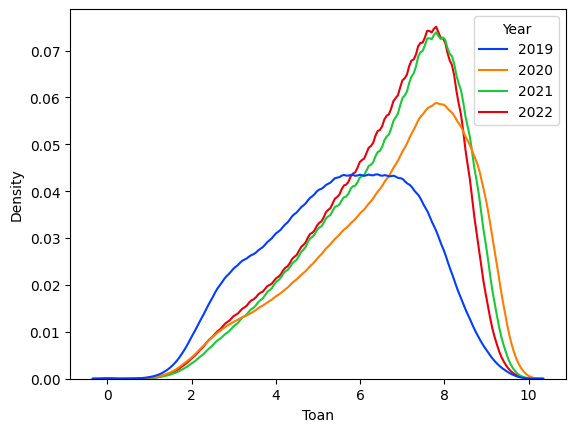

In [50]:
sns.kdeplot(data= df, x='Toan', hue='Year', palette='bright')
plt.show()

- Điểm yếu vị (mode - giá trị xuất hiện nhiều nhất) của cả 3 năm (2020-2022) đều giống nhau là 7,8. Phân bố điểm Toán năm nay không khác gì 2 năm trước, đường lên cũng dốc mà đường xuống còn dốc hơn. Điều này có thể chỉ ra rằng tính phân loại thí sinh của đề Toán năm nay không được tốt, khi mà độ khó của các câu hỏi chỉ nằm ở hai thái cực: cực dễ và cực khó.
- Tuy nhiên, năm 2019 thì có 1 khoảng nằm ngang ở giữa, điểm yếu vị 6.4, thể hiện việc đề thi có phân loại tốt: câu dễ, trung bình và khó.

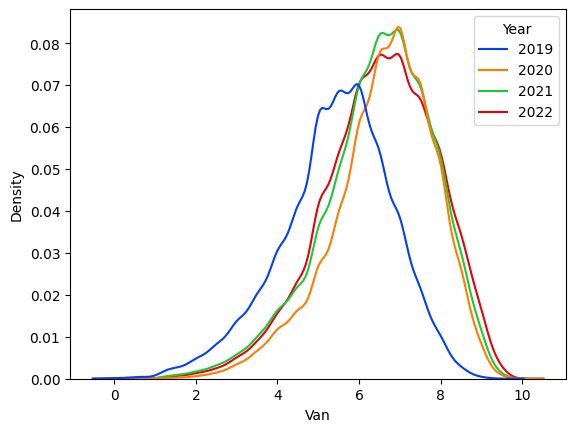

In [51]:

# Compare literature between 2 years
sns.kdeplot(data=df, x='Van', hue='Year', palette='bright', bw_adjust=2)
plt.show()

- Điểm văn nhìn chung khá bình thường.

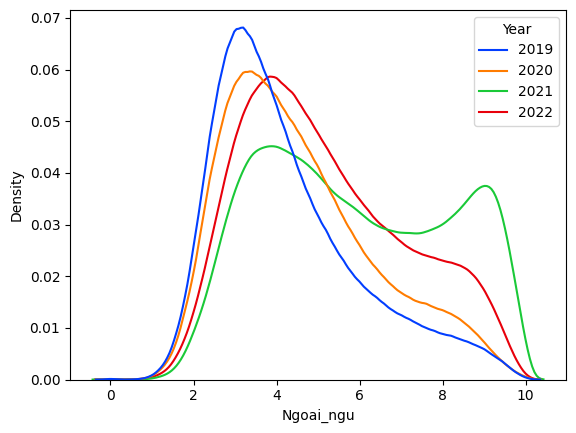

In [52]:
sns.kdeplot(data= df, x='Ngoai_ngu', hue='Year', palette='bright')
plt.show()

- Hầu hết các năm đều ổn định tuy nhiên, năm 2021 đồ thị có 2 đỉnh (một đỉnh cho nhóm học sinh kém ở 4 điểm và đỉnh còn lại cho nhóm học sinh giỏi ở 9 điểm). 
- Ở đây có sự chênh lệch vùng miền rất lớn về chất lượng dạy và học ngoại ngữ, tại những vùng thành phố hoặc vùng kinh tế phát triển, môn tiếng Anh được đầu tư tốt hơn. Tuy nhiên, biểu đồ Histogram năm 2019, 2020 có hình dạng phân bố rất bình thường. Giáo dục không thể chỉ trong 1 năm mà có thể thay đổi chất lượng dạy và học như vậy.
- Rút kinh nghiệm, năm 2022 đồ thị có xu hướng trở lại dạng bình thường.

In [53]:
f = open('../data/Matinh.txt', "r", encoding="utf-8")
f = f.read()
f = f.replace('\n','')
f = f.replace(' – ','  - ')
f = f.split("Mã tỉnh: ")
Matinh = {}
f.remove('')
for i in f:
    i = i.split(" - ")
    Matinh[int(i[0])] = i[1]

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24008611,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51000032,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51000005,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51000021,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51000013,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50
...,...,...,...,...,...,...,...,...,...,...,...
3660573,2022,64006584,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00
3660574,2022,64006585,5.6,6.50,2.8,NaN,NaN,NaN,6.25,6.75,8.50
3660575,2022,64006586,5.8,6.00,6.6,NaN,NaN,NaN,7.25,8.00,8.00
3660576,2022,64006587,7.6,6.75,7.0,NaN,NaN,NaN,8.75,7.25,9.75


In [54]:
import geopandas as gpd
map_df = gpd.read_file('../data/diaphantinh.geojson')
map_df.head()

,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."


In [55]:
#Sua loi
map_df.loc[44, 'ten_tinh'] = 'Quảng Bình'
map_df.loc[31, 'ten_tinh'] = 'Kiên Giang'
map_df.loc[12, 'ten_tinh'] = 'Cần Thơ'

In [56]:
df["sbd"] = (df["sbd"]//1000000)
df.rename(columns = {'sbd':'MaTinh'}, inplace = True)

In [57]:
temp = df["MaTinh"]
df["Tỉnh"] = temp.replace(Matinh)
df.head()

,Year,MaTinh,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD,Tỉnh
0,2019,24,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75,Hà Nam
1,2019,51,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN,An Giang
2,2019,51,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75,An Giang
3,2019,51,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00,An Giang
4,2019,51,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50,An Giang
...,...,...,...,...,...,...,...,...,...,...,...,...
3660573,2022,64,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00,Hậu Giang
3660574,2022,64,5.6,6.50,2.8,NaN,NaN,NaN,6.25,6.75,8.50,Hậu Giang
3660575,2022,64,5.8,6.00,6.6,NaN,NaN,NaN,7.25,8.00,8.00,Hậu Giang
3660576,2022,64,7.6,6.75,7.0,NaN,NaN,NaN,8.75,7.25,9.75,Hậu Giang


In [58]:
def merge_df(subject_name, map_df, df_2022):
    map_df = map_df.merge(df_2022.groupby('Tỉnh')[subject_name].mean(), how='left', left_on='ten_tinh', right_on='Tỉnh')
    map_df.rename(columns={subject_name: subject_name + '_avg'}, inplace=True)
    map_df = map_df.merge(df_2022.groupby('Tỉnh')[subject_name].std(), how='left', left_on='ten_tinh', right_on='Tỉnh')
    map_df.rename(columns={subject_name: subject_name + '_std'}, inplace=True)
    map_df = map_df.merge(df_2022.groupby('Tỉnh')[subject_name].apply(lambda x: (x >= 9).sum()/len(x)),
                         how='left', left_on='ten_tinh', right_on='Tỉnh')
    map_df.rename(columns={subject_name: subject_name + '_>=9'}, inplace=True)
    return map_df

In [59]:
# Create statistics
df_2022 = df[df['Year'] == 2022]
for subject_name in ['Toan', 'Van', 'Ngoai_ngu']:
    map_df = merge_df(subject_name, map_df, df_2022)
map_df.head()

,gid,code,ten_tinh,geometry,Toan_avg,Toan_std,Toan_>=9,Van_avg,Van_std,Van_>=9,Ngoai_ngu_avg,Ngoai_ngu_std,Ngoai_ngu_>=9
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...",6.532995,1.413811,0.008830,6.832086,1.218361,0.026704,5.214294,1.572482,0.020620
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8...",6.728949,1.434275,0.015244,6.483615,1.222594,0.007819,5.837798,1.919194,0.053629
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...",6.469325,1.651402,0.022478,6.821436,1.266226,0.024279,5.072878,1.740398,0.023160
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ...",5.551524,1.667308,0.007206,6.270404,1.429006,0.026859,4.205261,1.655999,0.011464
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...",6.678048,1.341956,0.014658,6.915358,1.010324,0.012163,5.037847,1.608973,0.017153


### Phân tích điểm trung bình môn Toán của các tỉnh trên Việt Nam năm 2022

In [60]:

def draw_map(variable):
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(40, 17))

    # # remove the axis
    ax.axis('off')
    print(variable)

    # create map
    if 'avg' in variable:
        cmap = 'Greens'
    elif '>=9' in variable:
        cmap = 'Reds'
    else:
        cmap = 'Blues'
    
    map_df.plot(column=map_df[variable], cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

    # Add Labels
    map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
    map_df['coords'] = [coords[0] for coords in map_df['coords']]
    map_df.sort_values(by=[variable], ascending=False, inplace=True)
    for idx, row in map_df[:5].iterrows():
        plt.annotate(text = row['ten_tinh'], xy=row['coords'], horizontalalignment='center')
        print(row['ten_tinh'])
    print("\n")

Toan_avg
Nam Định
Bình Dương
TP. Hồ Chí Minh
Ninh Bình
Thái Bình




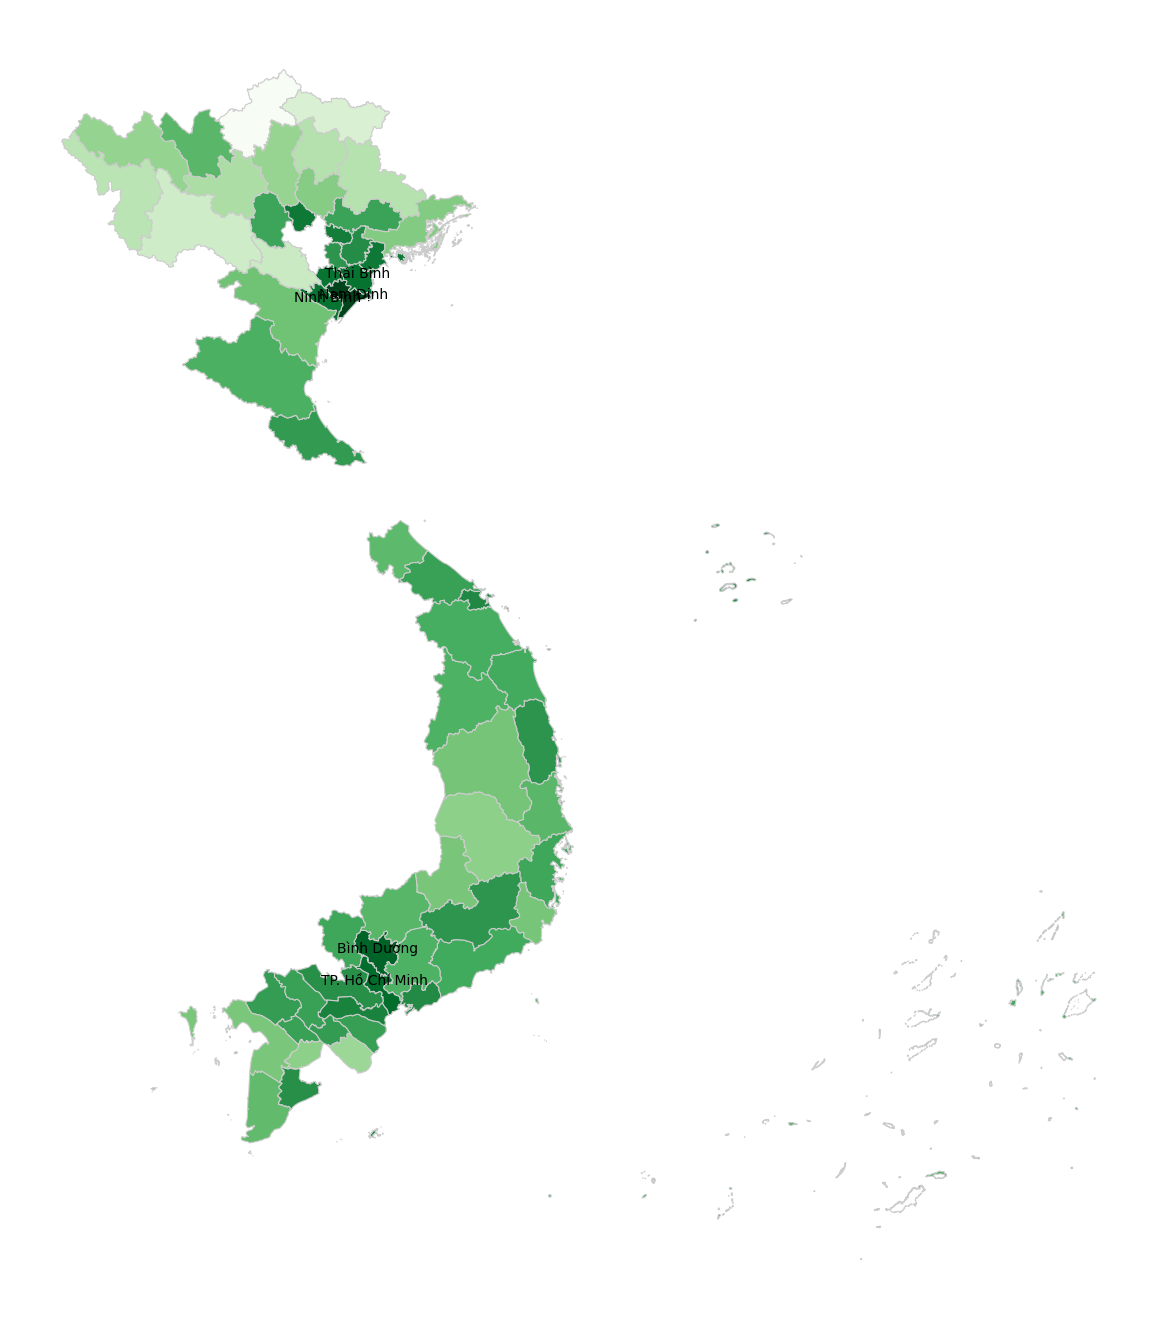

In [61]:
draw_map('Toan_avg')

- Điểm thi trung bình môn Toán cao nhất tập trung chủ yếu ở 2 vùng là TP.HCM, Bình Dương và Nam Định, Thái Bình, Ninh Bình

Toan_>=9
Nam Định
Thái Bình
Vĩnh Phúc
Bắc Ninh
Ninh Bình




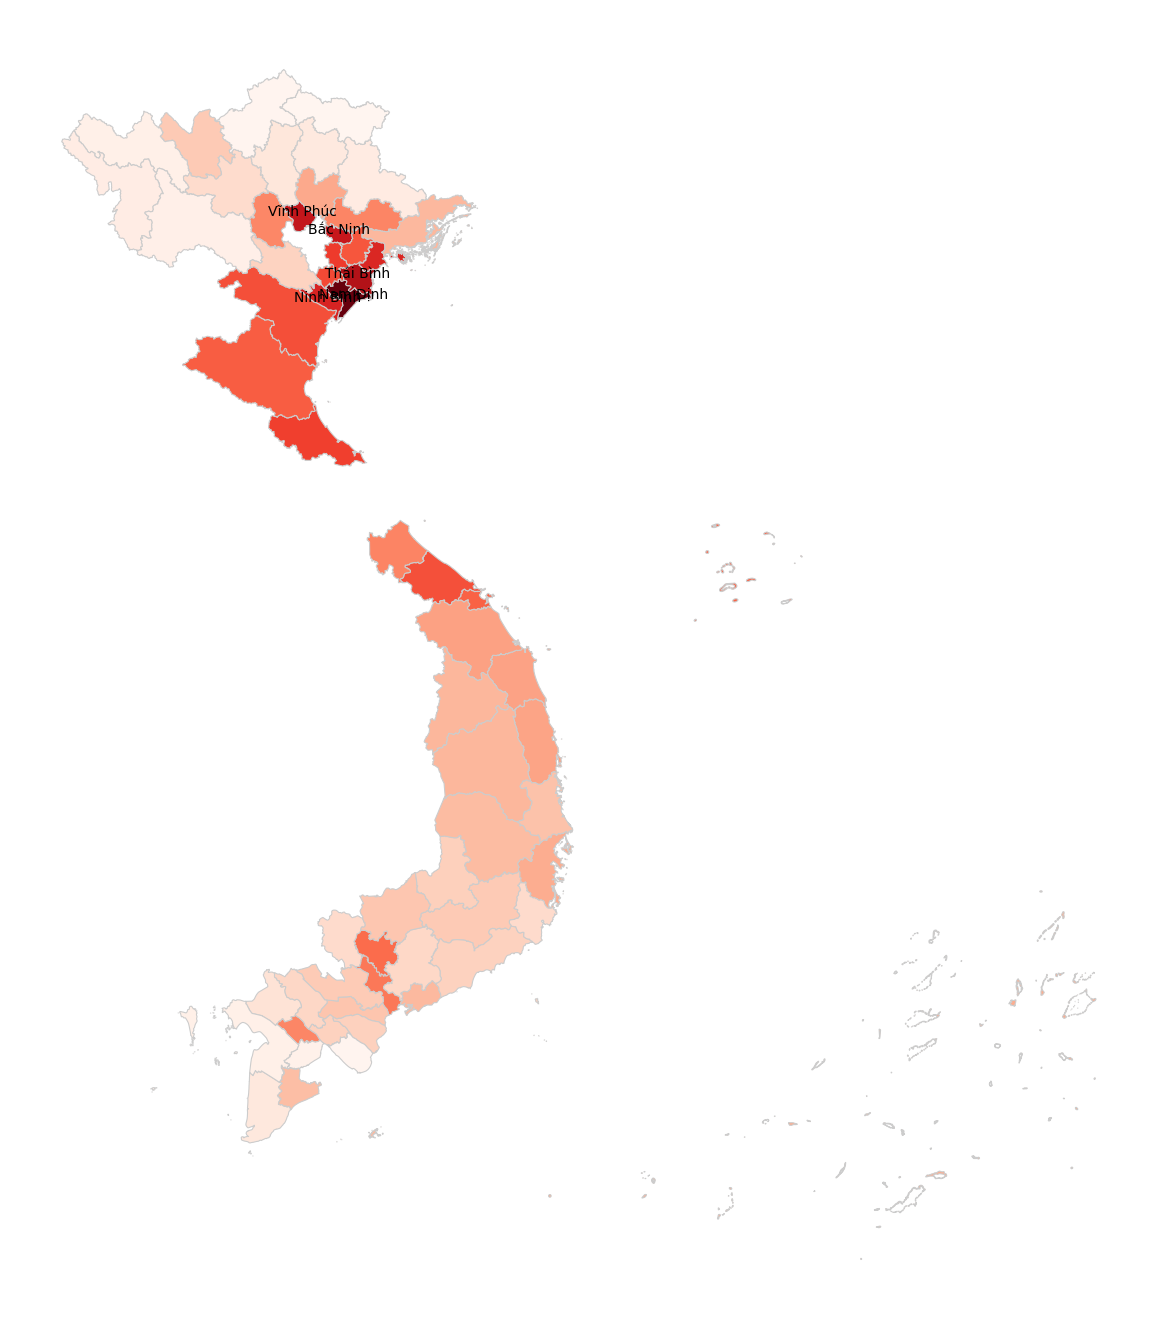

In [62]:
draw_map('Toan_>=9')

- Những nơi có điểm toán cao tập trung chủ yếu ở miền Bắc.

Toan_std
Thanh Hóa
Đăk Lăk
Thái Nguyên
Quảng Ninh
Cao Bằng




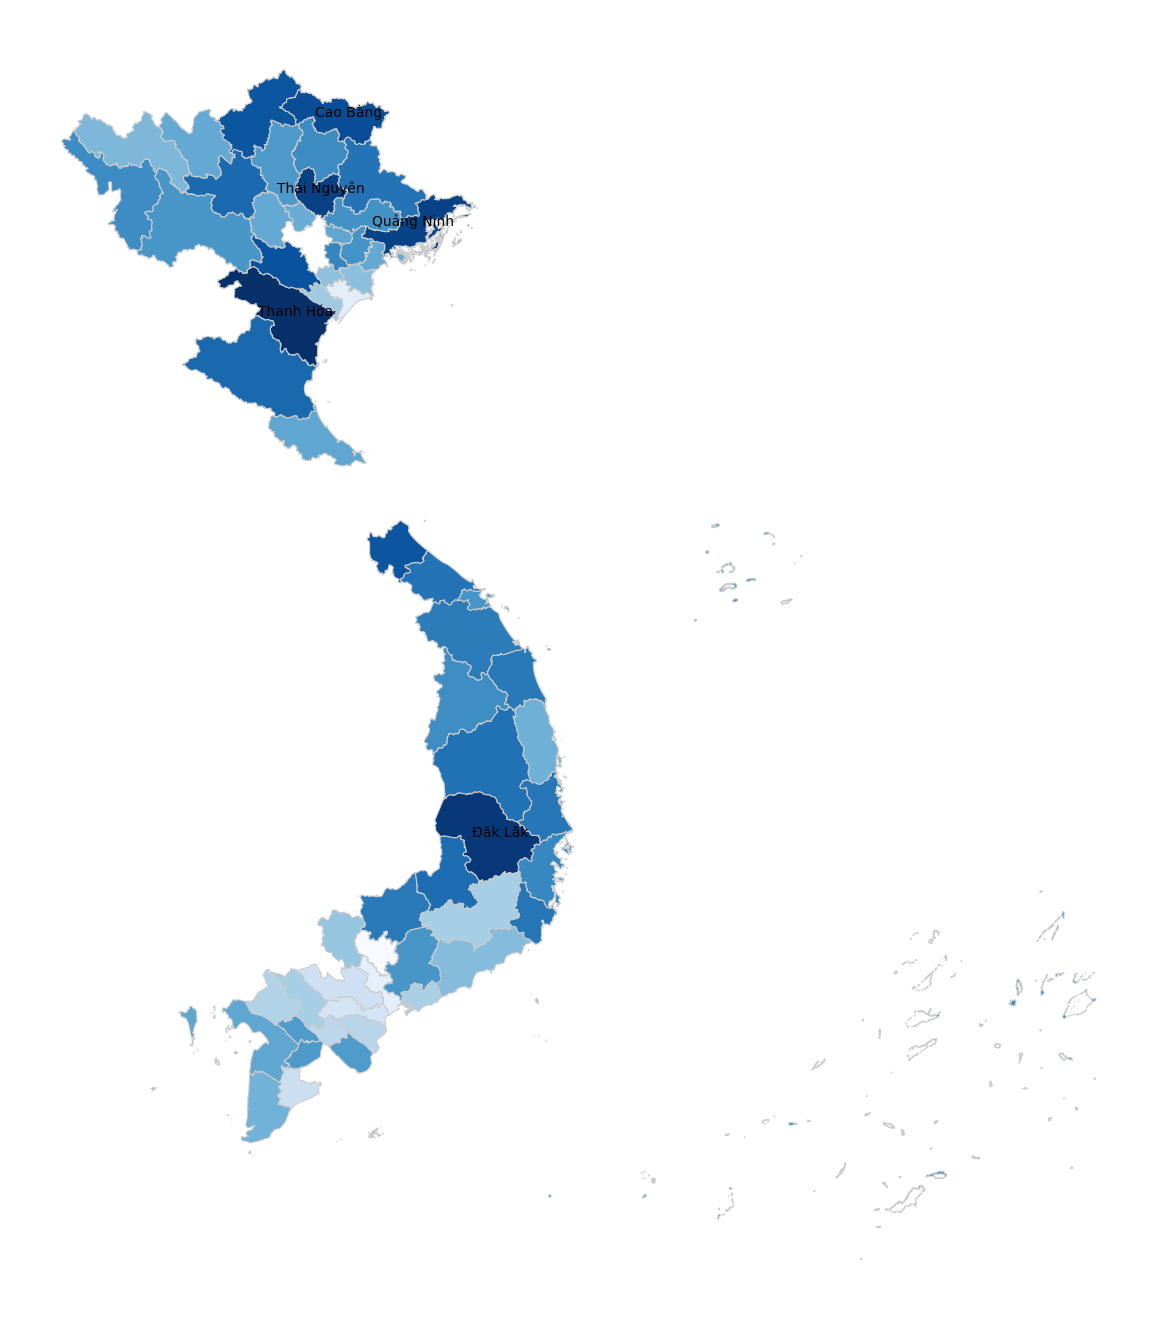

In [63]:
draw_map('Toan_std')

- Tuy nhiên, miền Bắc lại có tình trạng chênh lệch nhiều, có sự bất bình đẳng giáo dục, nhiều thí sinh điểm cao học giỏi nhưng cũng có nhiều thí sinh điểm thấp học kém.

Van_avg
Hải Phòng
Vĩnh Phúc
Hà Nam
Ninh Bình
Hà Tĩnh




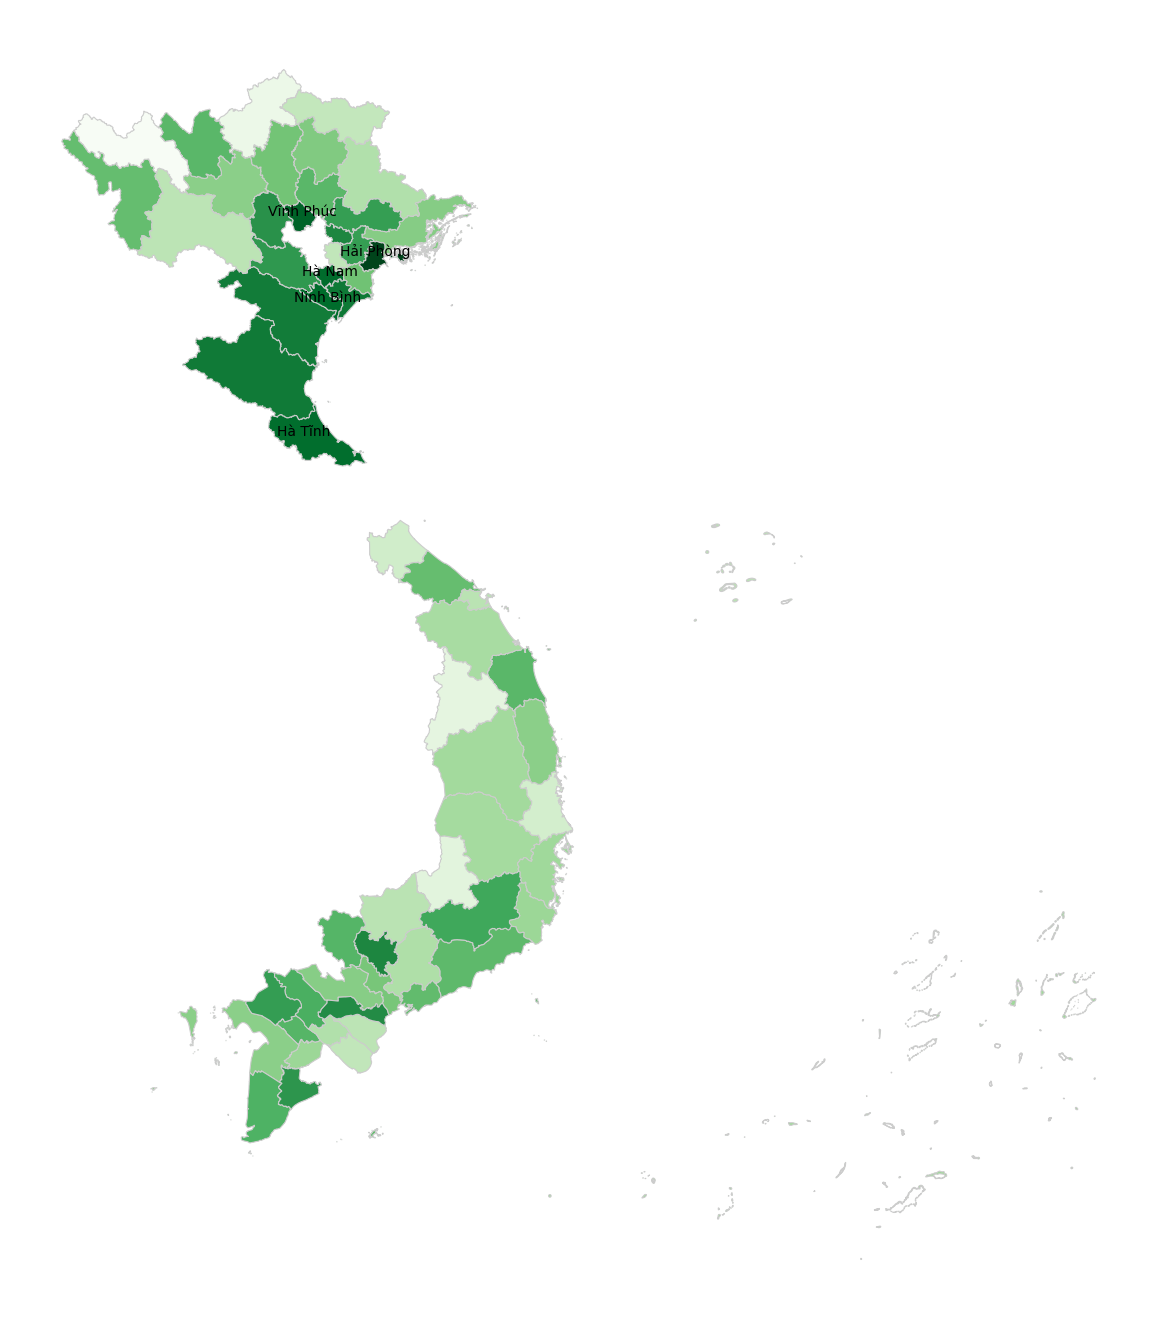

In [64]:
draw_map('Van_avg')

Van_>=9
Hải Phòng
Bắc Ninh
Nghệ An
Hà Tĩnh
Hà Nam




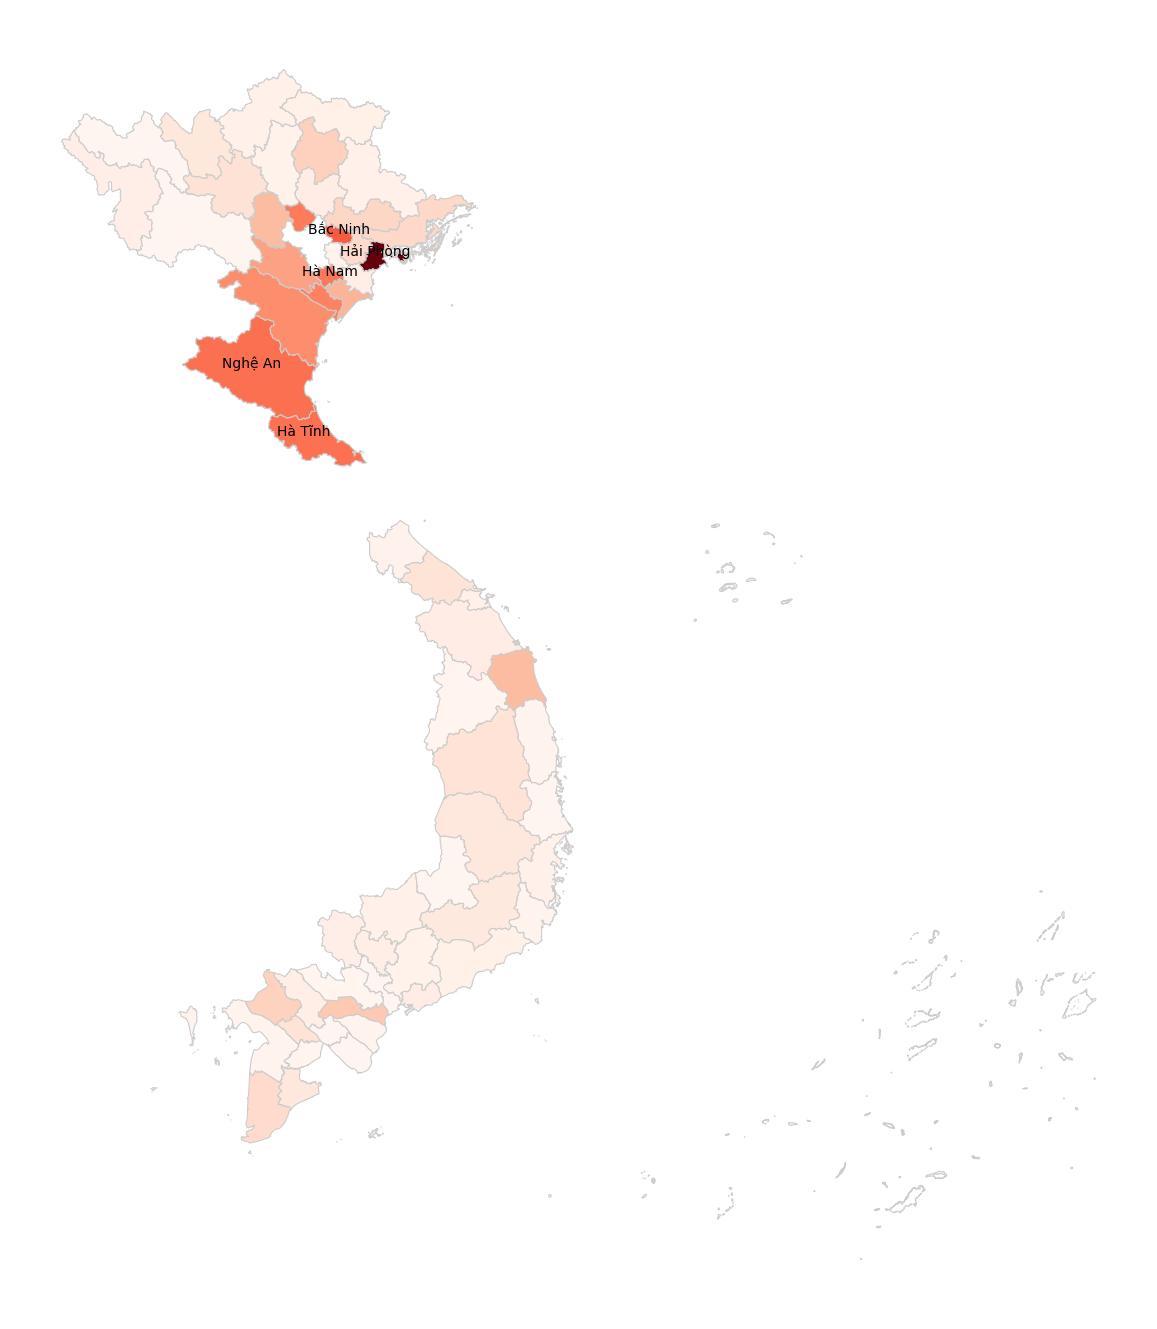

In [65]:
draw_map('Van_>=9')

Van_std
Quảng Ninh
Lạng Sơn
Hà Giang
Quảng Ngãi
Cao Bằng




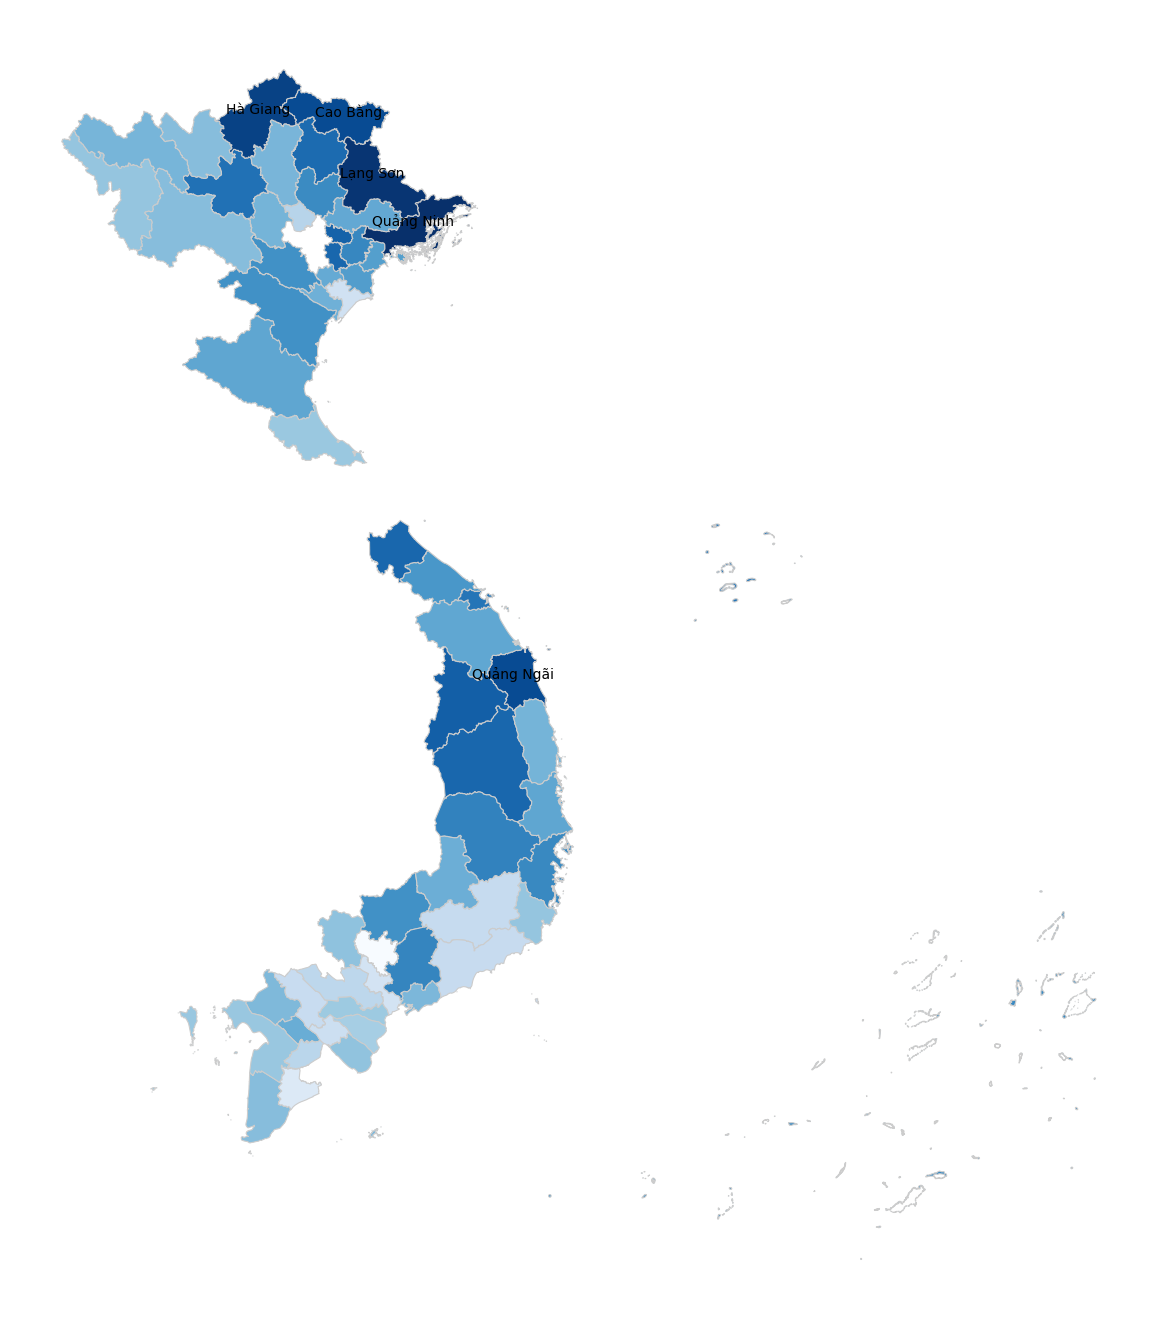

In [66]:
draw_map('Van_std')

- Có thể thấy đa phần điểm văn trung bình cao và điểm văn trên 9 điểm đều tập trung phía Bắc.
- Qua đây, có thể thấy miền Nam học đều hơn, vì phương sai của môn Toán và Văn cao đều tập trung ở miền Bắc.

Ngoai_ngu_avg
TP. Hồ Chí Minh
Bình Dương
Bà Rịa -Vũng Tàu
Hải Phòng
Đà Nẵng




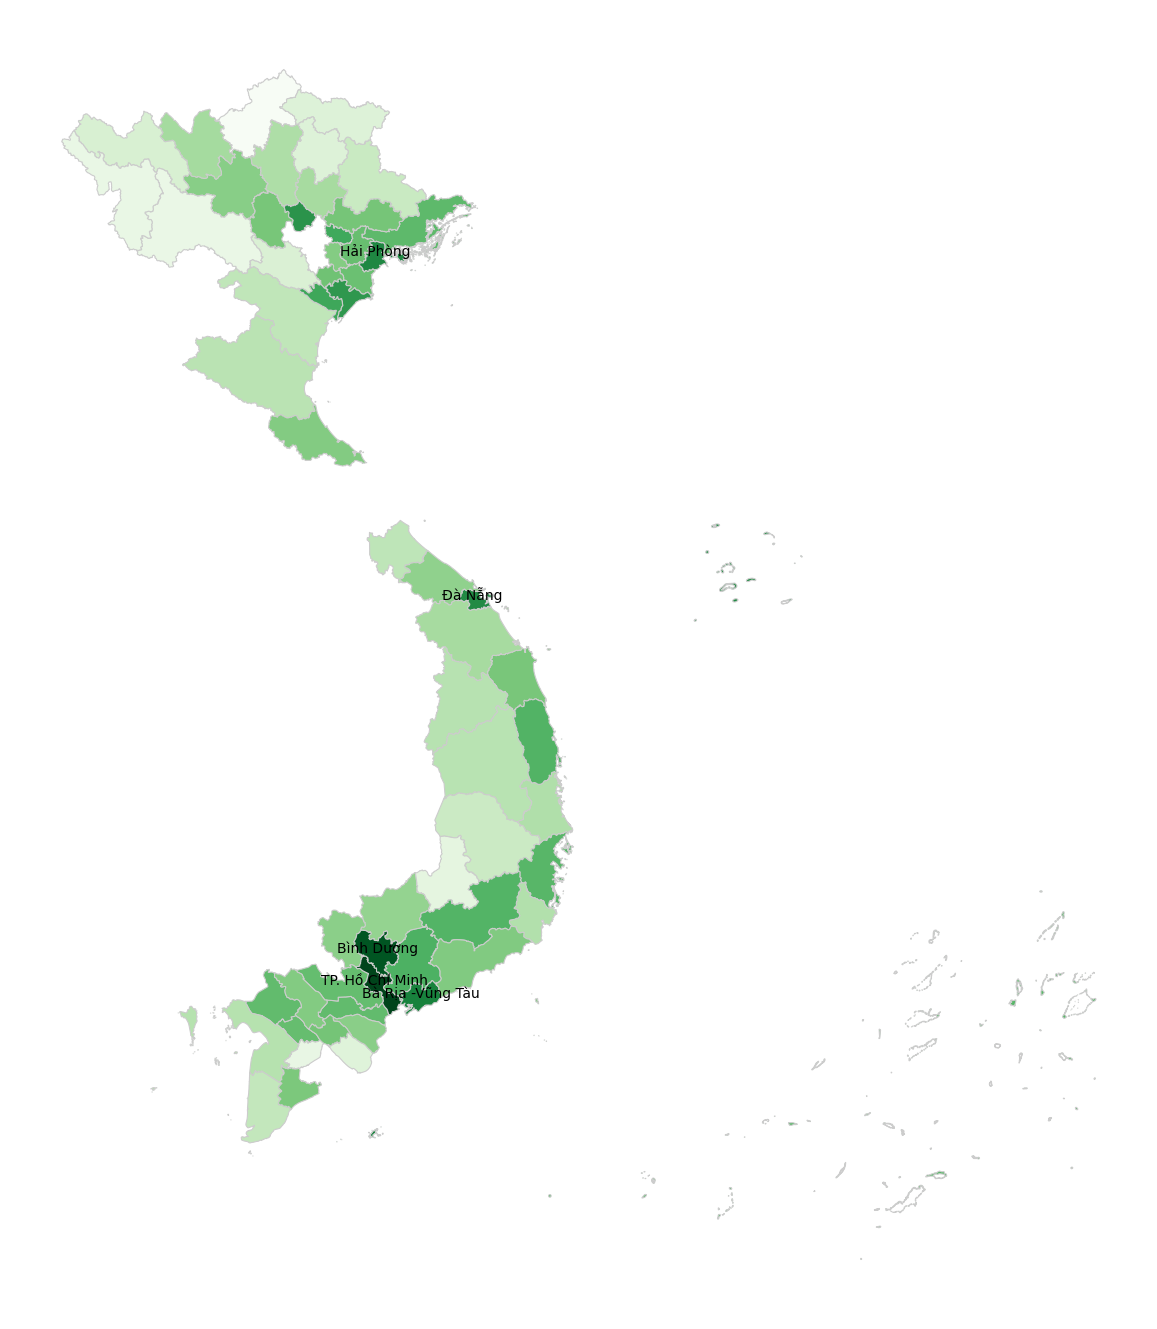

In [67]:
draw_map('Ngoai_ngu_avg')

Ngoai_ngu_>=9
TP. Hồ Chí Minh
Hải Phòng
Đà Nẵng
Bà Rịa -Vũng Tàu
Bình Dương




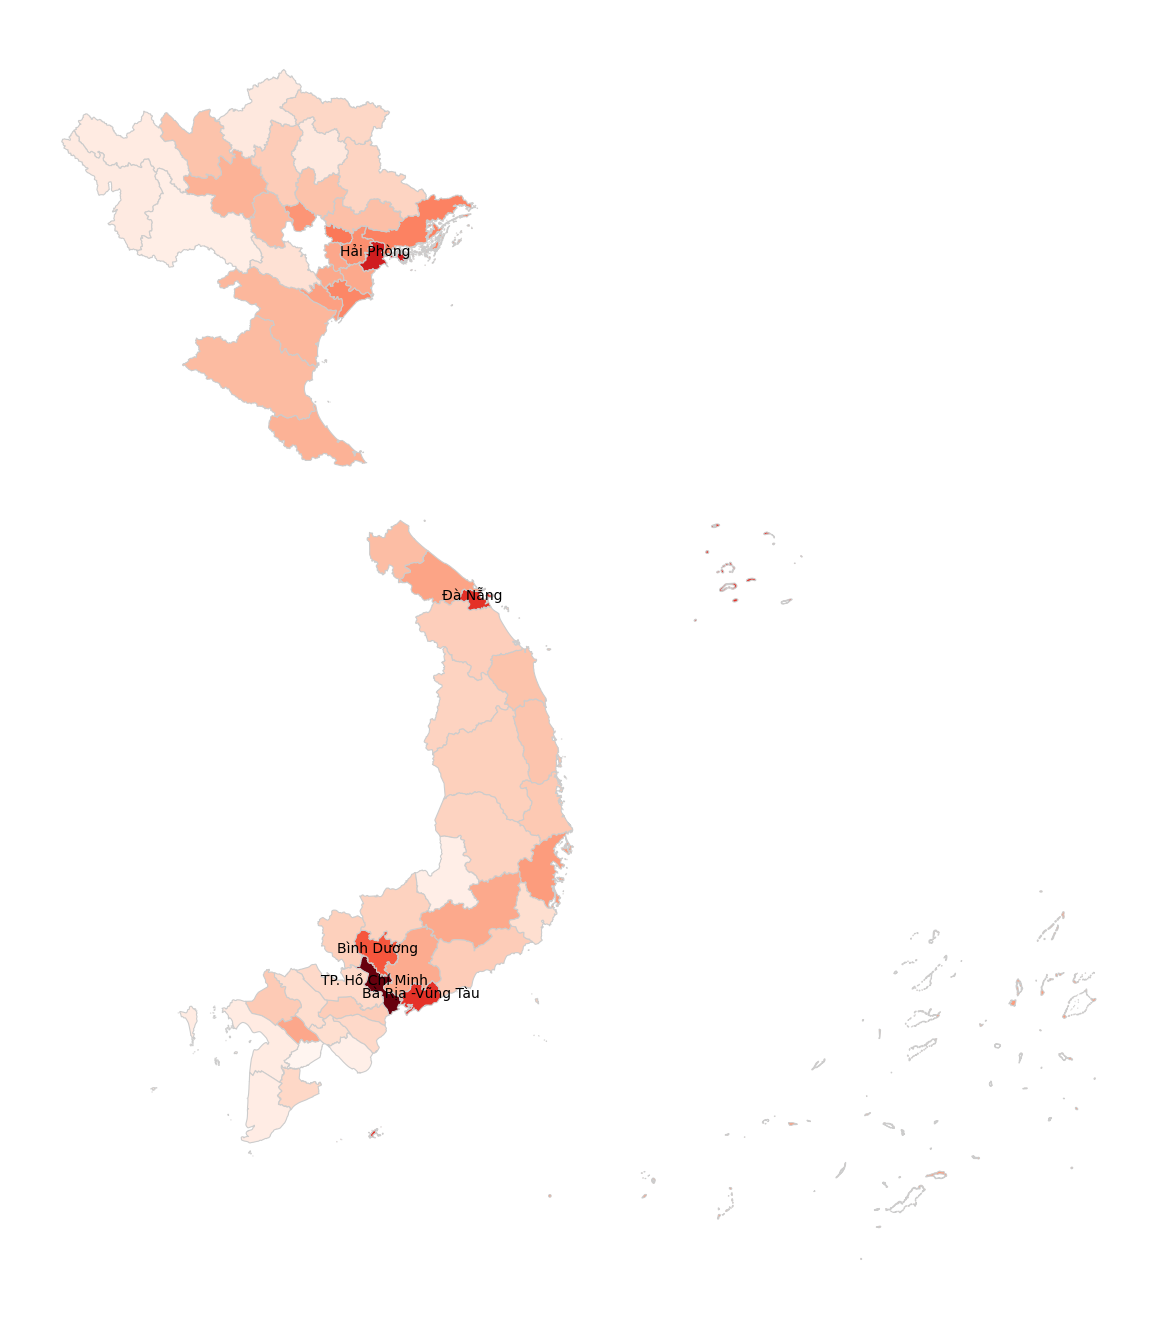

In [68]:
draw_map('Ngoai_ngu_>=9')

Ngoai_ngu_std
Đà Nẵng
Hải Phòng
Khánh Hòa
Quảng Ninh
Thừa Thiên Huế




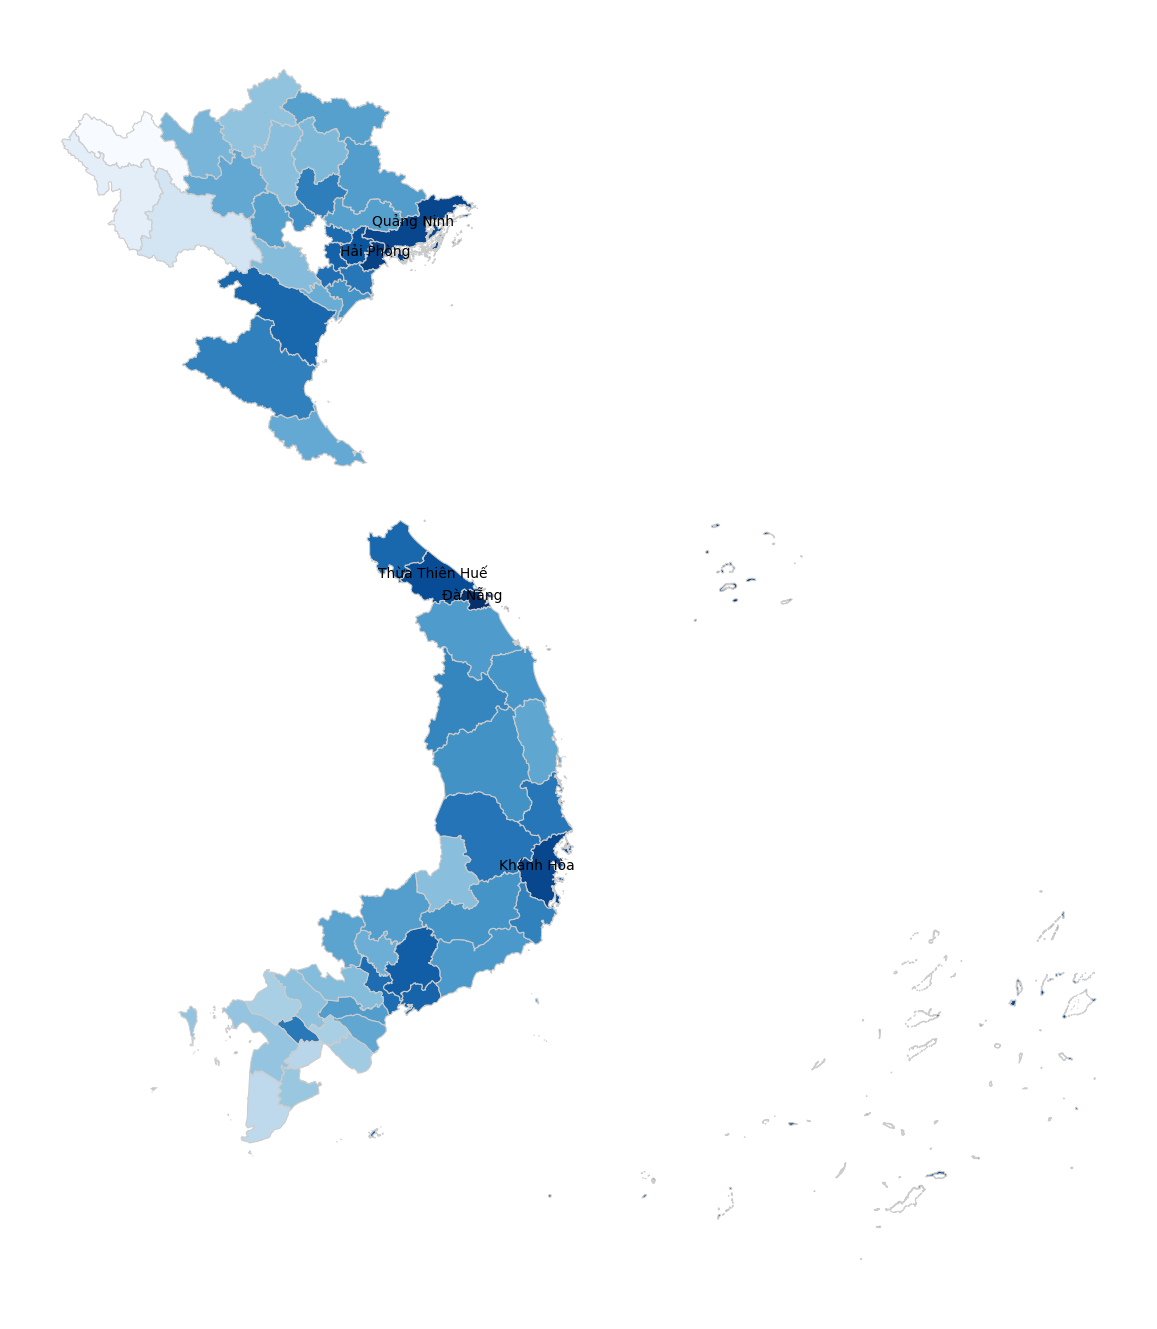

In [69]:
draw_map('Ngoai_ngu_std')

- Điểm trung bình tiếng Anh cao, và học sinh giỏi tiếng Anh đều tập trung ở các thành phố lớn, phát triển.

# LỢI ÍCH CỦA VIỆC TRẢ LỜI CÂU HỎI
- Nhìn chung, các tỉnh học giỏi thường co cụm xung quanh các TP lớn, cụ thể là thủ đô Hà Nội và TP HCM. Có thể thấy tình trạng bất bình đẳng giáo dục thể hiện rất rõ ràng ở miền Bắc, và ngược lại đối với miền Nam.
- Vì vậy, chúng ta cần phải cải thiện việc bất bình đẳng giáo dục ở miền Bắc.